In [310]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [311]:
#вводим два массива любых чисел
X = np.array([-1,0.1,0.3,0.5,0.8,1]).reshape((-1, 1))
Y = np.array([-0.2,0,0.2,0.4, 0.6, 0.8])

In [312]:
# этот массив надо сразу вводить в таком виде, но мне лень
X

array([[-1. ],
       [ 0.1],
       [ 0.3],
       [ 0.5],
       [ 0.8],
       [ 1. ]])

In [313]:
#находим среднее арифметическое у каждого массива
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [314]:
mean_x

0.2833333333333333

In [315]:
mean_y

0.3

In [316]:
#находим длину массива X
size = len(X)

In [329]:
# Y = b0 + b1*X - формула линейной регрессии
# b1 = sum(X - mean_x)(Y - mean_y)/sum(X - mean_x)^2 - наклон или смещение линии регрессии
# b0 - точка пересечения линии регрессии с осью

numer = 0 #просто переменные для комфорта
denom = 0

for i in range(size):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print (f'b1 = {b1} \nb0 = {b0}')

b1 = [0.49036545] 
b0 = [0.16106312]


In [330]:
# То же самое методом Крамера на всякий случай
X_num_2 = 0
X_num = 0
X_Y_num = 0
Y_num = 0

for i in range(size):
    X_num_2 += X[i]**2
    X_num += X[i]
    X_Y_num += X[i]*Y[i]
    Y_num += Y[i]
    
X_2 = X_num_2
X_sum = X_num
X_Y_sum = X_Y_num
Y_sum = Y_num

print(X_2)
print(X_sum)
print(X_Y_sum)
print(Y_sum)

[2.99]
[1.7]
[1.74]
1.8


In [331]:
kramer_all = X_2*size - X_sum*X_sum

kramer_a = X_Y_sum*size - Y_sum* X_sum
a = kramer_a/kramer_all

kramer_b = X_2*Y_sum - X_sum*X_Y_sum 
b = kramer_b/kramer_all

print(a) #b1
print(b) #b0

[0.49036545]
[0.16106312]


In [332]:
a*mean_x + b

array([0.3])

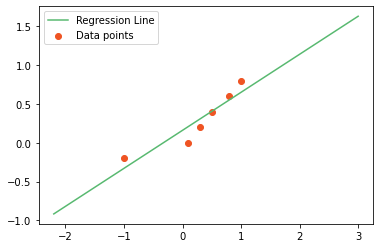

In [333]:
# График для наглядности (его в машинный код не нужно, это для меня)
max_x = np.max(X) + 2
min_x = np.min(Y) - 2

x = np.linspace(min_x, max_x, 2)
y = b0 + b1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Data points')

plt.legend()
plt.show()

In [334]:
# R^2 = sum(Ypred - mean_y)^2/sum(Y - mean_y) - коэффициент детерминции
# короче оцениваем херовость нашей регрессии и уходим в депрессию

ss_t = 0 #просто переменные для комфорта
ss_r = 0 

for i in range(size):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
    
R2 = 1 - (ss_r/ss_t)

print(R2)

[0.86164215]
